# Лабораторная 2  
### Предсказание сорта вина по химическим и физическим свойствам

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
        'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
        'OD280/OD315', 'Proline']
df = pd.read_csv('Загрузка/wine/wine.data', header = None, names = columns) 
display(df)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.describe().round(2)
# Основные описательные статистики

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [3]:
df.info() # смотрим общую информацию по датафрейму и всем признакам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Данный датасет состоит из 178 строк (наблюдений) и 14 столбцов, в 11 из которых тип данных float64, а в оставшихся трех: int64. Целевому категориальному признаку Class (Сорт вина) уже присвоенно численное значение. Других категориальных переменных нет, как нет и отсутствующих значений. Датафрейм в предобработке не нуждается.

<Axes: >

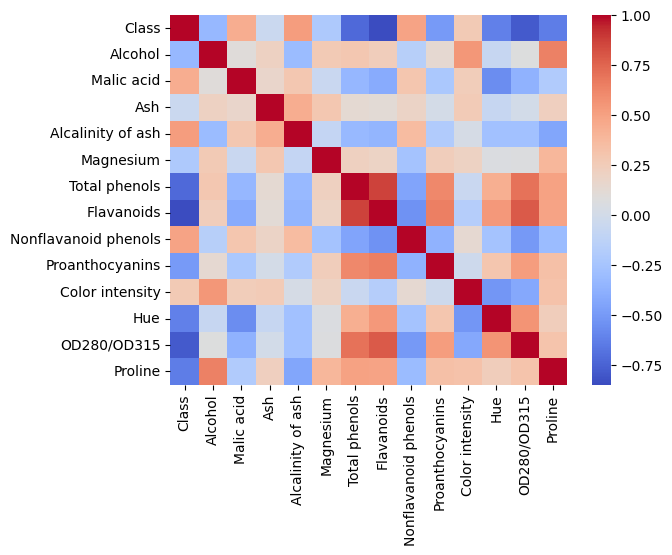

In [4]:
# Матрица корреляции
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

Наибольшее значение корреляции (R = 0,86) обнаружено между Flavanoids и Total phenols. Эти два признака логично взаимосвязаны и являются мультиколлениарными. Так же сильная отрицательная корреляция между Class и Flavanoids (-0,84), Class и OD280/OD315 (-0,78), Class и Total phenols (-0,71). Данное наблюдение указывает на то, что с изменением сорта с 1 по 3 в вине уменьшается количество фенолов, флаваноидов, а так же уменьшается значение OD280/OD315. 
Сильная прямая связь наблюдается между признаками Flavanoids и OD280/OD315 (0,78).

array([[<Axes: title={'center': 'Class'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic acid'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity of ash'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoid phenols'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color intensity'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'OD280/OD315'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

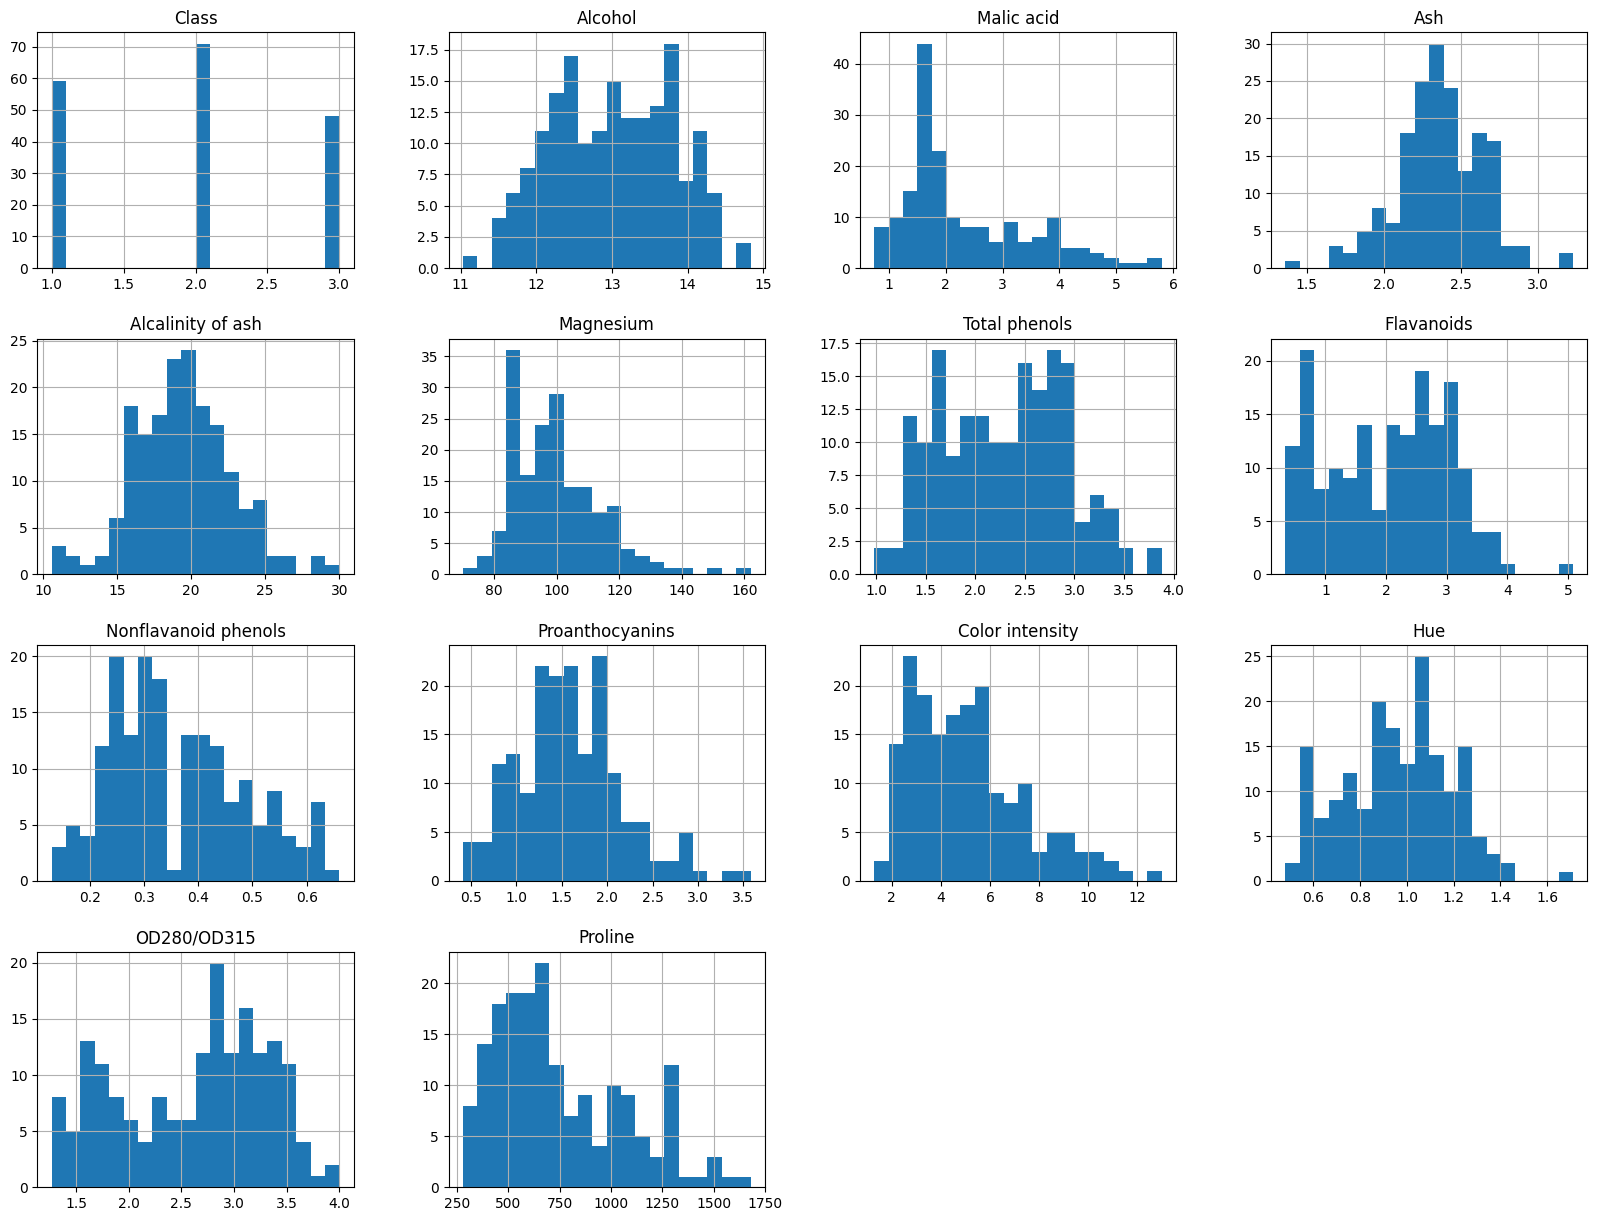

In [5]:
df.hist(bins=20, figsize=(20, 15))

Нормально распределены только значения Alcalinity of ash. Значит в целом будем считать, что данные отклоняются от гипотезы нормального распределения.


C:\Users\Вова\AppData\Local\Temp\ipykernel_14220\3304906835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcalinity of ash'])


ShapiroResult(statistic=0.9902253552856983, pvalue=0.26386884475337596)

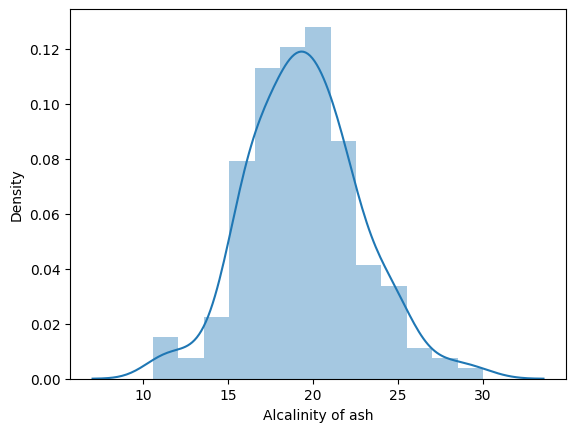

In [6]:
from scipy.stats import shapiro
sns.distplot(df['Alcalinity of ash'])

shapiro(df['Alcalinity of ash'])

### Дерево решений  
Первое дерево на 2х самых коррелирующих признаках с целевой переменной: Flavanoids (R=-0.85), OD280/OD315 (R=-0.79).

In [7]:
X = df[['Flavanoids', 'OD280/OD315']] # два самых коррелируемых признака с Class
y = df['Class']

from sklearn.model_selection import train_test_split
# разделение на выборки для обучения и тестирования из исходных данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

In [8]:
from sklearn.tree import DecisionTreeClassifier
# создаем дерево решений
dec_tree = DecisionTreeClassifier(criterion='gini')
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

Построение матрицы несоответствий

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (multilabel_confusion_matrix,
                             classification_report, accuracy_score, 
                             precision_score, recall_score, f1_score)

multcon_mat = multilabel_confusion_matrix(y_test, y_pred)
print(multcon_mat)

[[[32  3]
  [ 5 14]]

 [[28  7]
  [ 5 14]]

 [[36  2]
  [ 2 14]]]


Так как у нас три класса, то и матрицы получилость тоже три. Можно обобщить по всем классам.

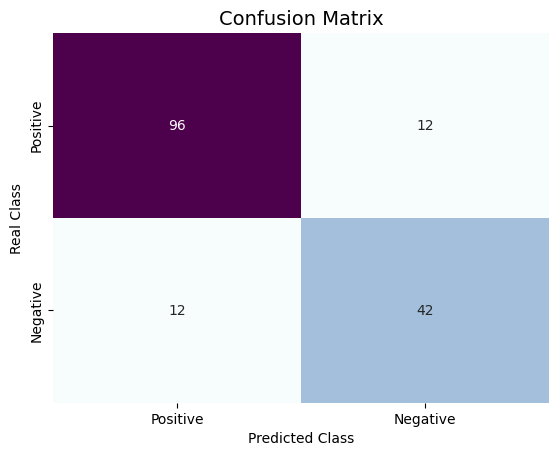

In [10]:
total_multcon_mat = multcon_mat[0] + multcon_mat[1] + multcon_mat[2]
sns.heatmap(total_multcon_mat, annot=True, cbar=False, cmap='BuPu', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Class', fontsize=10)
plt.ylabel('Real Class', fontsize=10)
plt.show()

Метрики для первого дерева решений

In [11]:
accur = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy :', round(accur, 2))
print('Precision:', precision.round(2))
print('Recall:', recall.round(2))
print('F1 score:', f1.round(2))

Accuracy : 0.78
Precision: 0.78
Recall: 0.78
F1 score: 0.78


Так как у нас мультиклассовая классификация были рассчитаны средневзвешенные (weighted) значения данных метрик. Метрики по классам представлены ниже.

In [12]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.74      0.78        19
           2       0.67      0.74      0.70        19
           3       0.88      0.88      0.88        16

    accuracy                           0.78        54
   macro avg       0.79      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



Дерево решений на 2х самых не коррелирующих признаках: Зольность (R=-0.05) и Магний (R=-0.20)

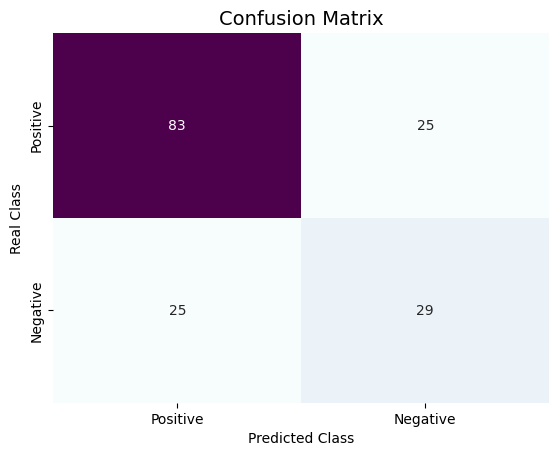

In [13]:
X = df[['Ash', 'Magnesium']] # два самых не коррелируещих признака с Class
y = df['Class']

from sklearn.model_selection import train_test_split
# выборки для обучения и тестирования из исходных данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

# создаем дерево решений
dec_tree = DecisionTreeClassifier(criterion='gini')
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

multcon_mat = multilabel_confusion_matrix(y_test, y_pred)
total_multcon_mat = multcon_mat[0] + multcon_mat[1] + multcon_mat[2]
sns.heatmap(total_multcon_mat, annot=True, cbar=False, cmap='BuPu', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Class', fontsize=10)
plt.ylabel('Real Class', fontsize=10)
plt.show()

Метрики для второго дерева

In [14]:
accur = accuracy_score(y_test, y_pred)
# средневзвешенные (weighted) значения метрик
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy :', round(accur, 2))
print('Precision:', precision.round(2))
print('Recall:', recall.round(2))
print('F1 score:', f1.round(2))
print()
print('Метрики по каждому классу:')
print(metrics.classification_report(y_test, y_pred))

Accuracy : 0.54
Precision: 0.52
Recall: 0.54
F1 score: 0.52

Метрики по каждому классу:
              precision    recall  f1-score   support

           1       0.50      0.63      0.56        19
           2       0.65      0.68      0.67        19
           3       0.40      0.25      0.31        16

    accuracy                           0.54        54
   macro avg       0.52      0.52      0.51        54
weighted avg       0.52      0.54      0.52        54



В целом, можно сказать, что дерево построенное на хорошо коррелирующих признаках с целевой переменной обладает гораздо лучшей предсказательной силой (F1-score = 0,78), чем дерево решений построенное на плохо коррелирующих признаках (F1-score = 0,52).

### Случайный лес

In [15]:
from sklearn.model_selection import train_test_split

# разделяем столбцы на зависимые и независимые переменные
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
# создаеи выборки для обучения и тестирования из исходных данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

In [16]:
from sklearn.ensemble import RandomForestClassifier

# модель случайного леса на обучающем наборе и предсказания на тестовом
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [17]:
# замер точности модели, используя фактические и спрогнозированные значения
from sklearn import metrics

accur = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy :', round(accur, 2))
print('Precision:', precision.round(2))
print('Recall:', recall.round(2))
print('F1 score:', f1.round(2))
print()
print('Метрики по каждому классу:')
print(metrics.classification_report(y_test, y_pred))

Accuracy : 0.98
Precision: 0.98
Recall: 0.98
F1 score: 0.98

Метрики по каждому классу:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.97        19
           3       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



C:\Users\Вова\AppData\Local\Temp\ipykernel_14220\3657315557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette='summer')


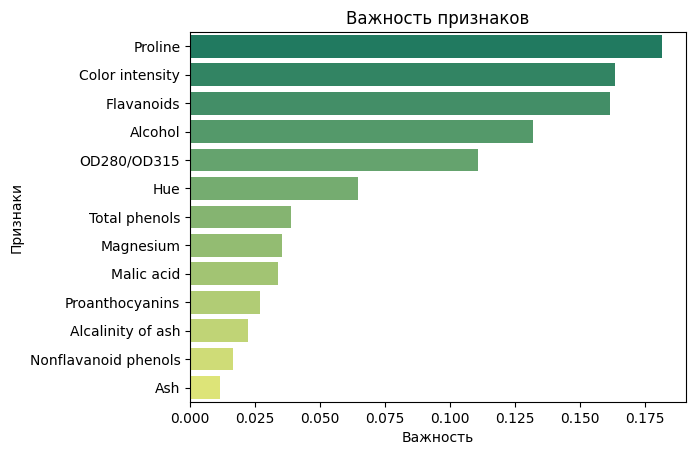

In [18]:
feature_imp = pd.Series(rf.feature_importances_, index=df.columns[1:]).sort_values(ascending=False)

import matplotlib.pyplot as plt
sns.barplot(x=feature_imp, y=feature_imp.index, palette='summer')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title("Важность признаков")
plt.show()

Важность признака, скорее всего, не зависит от того, на сколько этот признак коррелирует с целевой переменной.

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_prob = rf.predict_proba(X_test)
ra = roc_auc_score(y_test, y_prob, multi_class='ovo')
print('ROC AUC:', ra)

ROC AUC: 1.0


In [16]:
# Запись датафрейма в эксель
df.to_excel('Wine.xlsx')